# 12. Visualisation

## Exercise 12.1

In exercise 11.3, you created a CSV file named 'prices_of_coffee_over_time.csv', containing data about the average price of a pound of coffee on a range of dates. Use this CSV file to create a line chart which visualises the development of these prices over time. 

In [ ]:
import pandas as pd

df = pd.read_csv('prices_of_coffee_over_time.csv')

df = df.sort_values(by=['date'])

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig = plt.figure( figsize = ( 16, 4))
ax = plt.axes()

ax.plot( df['date'] , df['price_per_pound'] , color = '#930d08' , linestyle = 'solid')

ax.set_xlabel('Date')
ax.set_ylabel('Price per pound')

plt.xticks(rotation= 90)

ax.set_title( 'VOC Coffee auctions')

plt.show()

## Exercise 12.2

Download the following data set:

https://edu.nl/bcm4x

This file contains data collected for the [2018 Better Life Index](https://stats.oecd.org/index.aspx?DataSetCode=BLI), which was created by the OECD to visuale some of the key factors  that contribute to well-being in OECD countries, including education, income, housing and environment.

Using `Seaborn`, create a bar chart which can be used to compare either the 'personal_earnings' or the 'life_satisfaction' in the various OECD countries. The colours of the bars should give information about the continents. 

Customise the graph as follows:
* Use the `hls` colour palette
* The size of the figure must be 14x10
* x-tick labels must be rotated by 90 degrees 
* The legend must be placed outside of the plot

In [167]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get('https://edu.nl/bcm4x')
if response:
    data = response.text
    with open('bli.csv' , 'w') as csv:
        csv.write(data)
        
df = pd.read_csv('bli.csv')

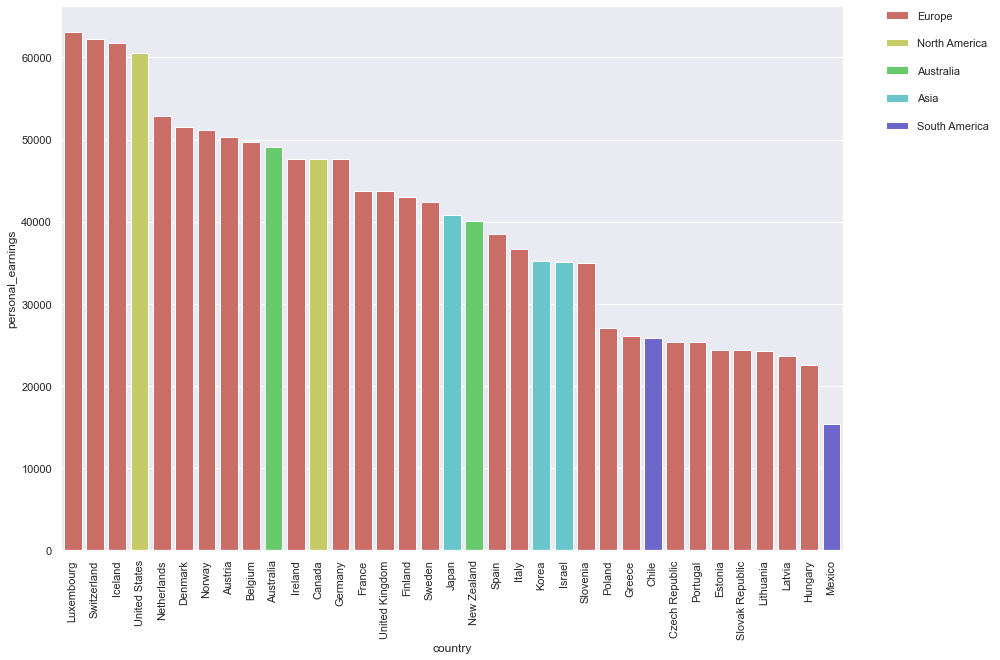

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'country'
y_axis = 'personal_earnings'

colours = sns.color_palette('hls' )

# Remove missing values and sort the values in a descending order
df = df.dropna(subset = [ y_axis ])
df = df.sort_values(by=[ y_axis] , ascending = False)

fig = plt.figure( figsize=( 14 , 10 ) )

ax = sns.barplot( data =  df , x = x_axis , y= y_axis , hue = 'continent' , dodge = False , palette = colours )

plt.xticks(rotation= 90)

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

The bar chart can also be created using `matplotlib` alone, but the code is more complicated. 

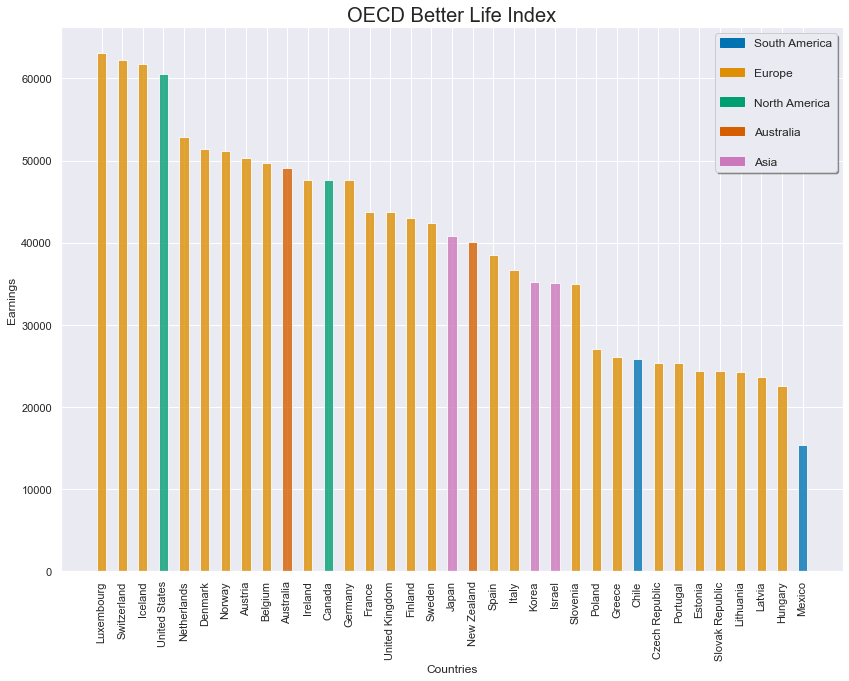

In [169]:
colours = sns.color_palette('colorblind', 5)
classColours = dict()

unique_categories = list( set( df['continent'] ) )
if len( unique_categories ) <= len(colours):
    for u in range( len( unique_categories ) ):
        classColours[ unique_categories[u] ] = colours[u]
else:
    print("You have more than {} categories. You need to add colours to the list!".format( len(colours) ))

colours = []
for category in df['continent']:
    colours.append( classColours[category] )
    

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd


fig = plt.figure( figsize=( 14 , 10 ) )
ax = plt.axes()


bar_width = 0.45
opacity = 0.8

ax.bar( df['country'] , df[y_axis] , width = bar_width, alpha = opacity , color = colours)

plt.xticks(rotation= 90)


patchList = []
for key in classColours:
    data_key = mpatches.Patch(color=classColours[key], label=key)
    patchList.append(data_key)
    
plt.legend(handles=patchList , shadow=True, fontsize='large' , frameon = True )


ax.set_xlabel('Countries' , fontsize= 12)
ax.set_ylabel( 'Earnings' , fontsize = 12 )
ax.set_title( 'OECD Better Life Index' , fontsize=20 )


plt.show()

## Exercise 12.3

Use the CSV file that you have downloaded for exercise in 12.2 to create a scatter plot. The X-axis must visualise the values in the column 'self-reported_health', and the Y-axis must show the 'employment_rate'. The size of the points must represent the 'educational_attainment' and the colour of the points ust indicate the values collected for 'air_pollution'. 

Apply the following specifications: 
* Use the `'whitegrid'` style.
* Work with the `'Greens'` colour palette. 
* Sizes of the dots should range from 100 to 1000. 
* The size of the figure must be 10x10
* The legend must be placed outside of the plot
* Add labels to all of the dots, explaining the names of the countries that are represented. The font size must be 12.8. 

N.B. Names of exiting colour palettes can be found at [https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/) or at https://seaborn.pydata.org/tutorial/color_palettes.html. Examples include: "Blues", "BuGn", "YlOrRd", "GnBu", "OrRd", "Greens", "Reds". You may also experimnent with some other colour palettes in this exercise. 

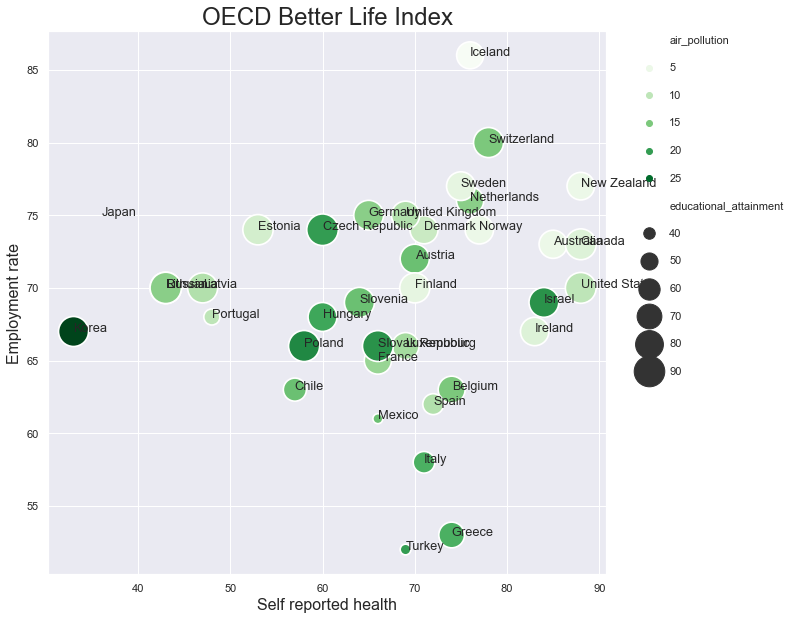

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'self-reported_health'
y_axis =  'employment_rate'
point_size =  'educational_attainment'
point_colour = 'air_pollution' 

df = pd.read_csv('bli.csv')
df = df.dropna(subset = [x_axis, y_axis])

fig = plt.figure( figsize = ( 10,10 ))

sns.set_style('whitegrid')


## and also adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})


ax = sns.scatterplot(x = x_axis , y = y_axis  , data=df, hue= point_colour , palette="Greens" , size = point_size , sizes=( 100 , 1000) )

for index, row in df.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['country'] , fontsize=12.8)


ax.set_xlabel( 'Self reported health'  , fontsize = 16 )
ax.set_ylabel( 'Employment rate'  , fontsize = 16 )
ax.set_title( 'OECD Better Life Index' , fontsize=24 )


# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


## Exercise 12.4

PISA is the OECD's [Programme for International Student Assessment](https://www.oecd.org/pisa/). This programme evaluates educational systems globally by measuring the performance of 15 year-old-children in mathematics, science and reading. The latest study is from 2018. 

The CSV file '[pisa.csv](https://edu.nl/p97ma)' contains all the scores measured for mathematics and reading in between 2000 and 2018.  

Using Pandas, Matplotlib and Seaborn, create visualisations which can help to answer the following questions:

1. How did the various countries that were examined in 2018 perform on the reading tests? Which countries had the highest scores, and which countries had the lowest scores? Try to answer this question via a bar plot. You can limit the analyses to the the 'total' scores (i.e. those records in which column 'object' has value 'TOT'). Create a figure with a size of 10x7, rotate the x-tick labels by 90 degrees and use the colour '#910c26'' fpor all the bars. 

2. Same as (1), but try to give information about the continents as well. Use distinctive colours for each continent. 

3. How do the scores for reading compare to the scores for mathematics? Focus on the scvores obtained in 2018. Answer this question by creating a scatter plot. 

4. Same as (3), but add labels to indicate the scores for the countries captured in the list named `countries`, defined below. 

```
countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg','Italy']
```

5. How did the scores for reading develop in the Netherlands in between 2000 and 2018? Focus on the total scores.

6. How did the scores for maths develop in the Netherlands in between 2000 and 2018? Focus on the score for boys and for girls separately. 

7. Have the scores remained relatively stable over the years if we look at the total scores? Or has there been some variation? How does the variation of the scores for the Netherlands compare to the scores in France, Germany, Belgium and Luxembourg? Try to answer this question by crearing a boxplot. 

Firstly, download the CSV file and read its contents using `read_csv` method from pandas. 

In [172]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get('https://edu.nl/p97ma')
if response:
    data = response.text
    with open('pisa.csv' , 'w') as csv:
        csv.write(data)
        
df = pd.read_csv('pisa.csv')


To answer question (1), create a new data frame containing the total scores measured in the year 2018. We can subset the dataframe using square brackets. These brackets should contain a criterium that can serve as a filter.  

the `sort_values()` method can be used to sort the dataframe. The `by` parameter specifies the column you want to sort on. 

In [175]:
df_2018 = df[ (df['subject'] == 'TOT') & (df['year'] == 2018)  ]
df_2018 = df_2018.sort_values(by=[ 'pisa_read'] , ascending = False)

Next, we can plot the values in this new data frame using `Seaborn`. This plot should help us to answer question 1. 

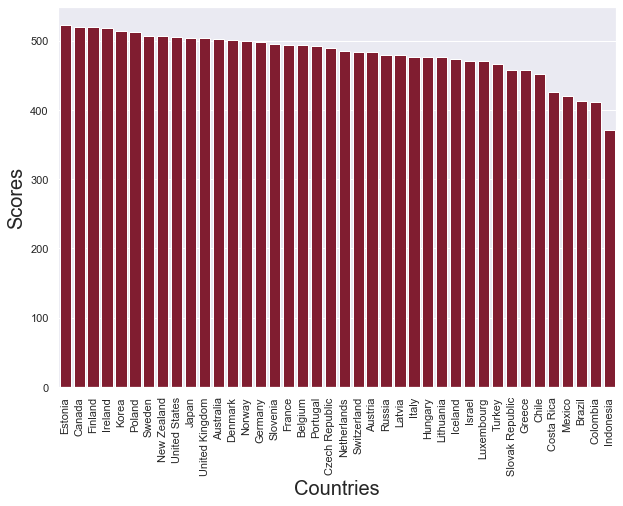

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
plt.figure( figsize = ( 10,7 ))

graph = sns.barplot( data = df_2018 , x = 'location_name' , y = 'pisa_read' , color = '#910c26' )

graph.set_xlabel('Countries', size = 20) 
graph.set_ylabel('Scores', size = 20) 


plt.xticks( rotation = 90 )

plt.show() 


To vary the colours of the bars along with the continents (question 2), name the 'continent' column in the `hue` parameter. 

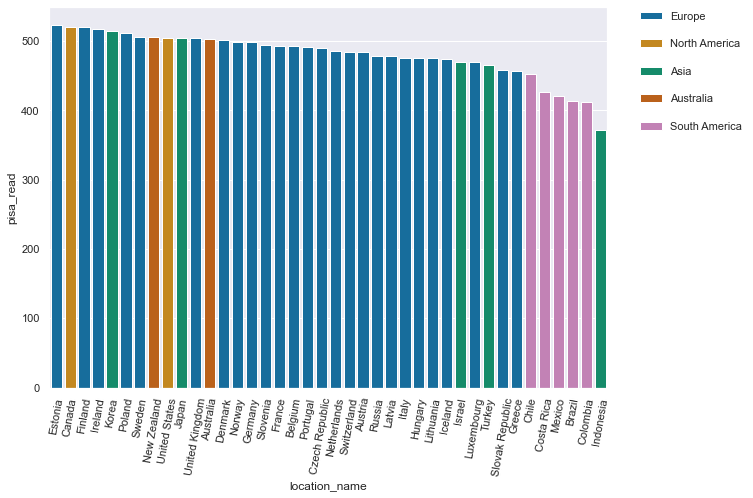

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
colours = sns.color_palette('colorblind' , 7)
plt.figure( figsize = ( 10,7 ))

# 'hue' determines the colours of the bars. It can be 
# connected to one of the variables in the
# data frame


sns.barplot( data = df_2018 , x = 'location_name' , y = 'pisa_read' , hue = 'continent' , dodge = False  , palette = colours )

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation = 80 )

plt.show() 


To examine the correlation between `pisa_read` and `pisa_math` (question 3), we can visualise these two variables using a scatter plot. We can work with the dataframe named `df_2018` that we created earlier.

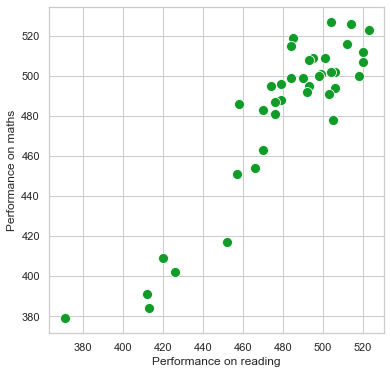

In [178]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure( figsize = ( 6,6 ))


sns.set_style('whitegrid')
graph = sns.scatterplot(x = 'pisa_read' , y = 'pisa_math' , 
                data = df_2018 , color = '#119c2a' , s = 100 ) 

graph.set_xlabel('Performance on reading')
graph.set_ylabel('Performance on maths')


plt.savefig('scatterplot.png' , dpi = 300 )



Text labels for the dots in a scatter plot (see question 4) can be added using `plt.text()`. The method demands at least parameters:
* Position on x-axis
* Position on y-axis
* Label (as a String)

There are a number of optional parameters:
* fontweight
* fontsize
* alpha 

Note that the labels need to be added one by one. The plt.text() function adds one label at a time. If your data is in a dataframe, you can work with `iterrows()`.


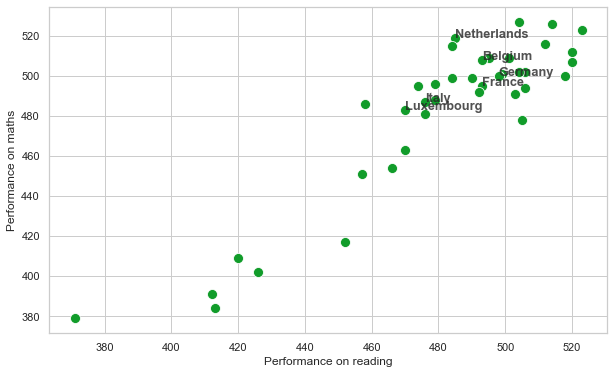

In [179]:
import pandas as pd

x_axis = 'pisa_read'
y_axis = 'pisa_math'


import matplotlib.pyplot as plt
import seaborn as sns

countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg','Italy']


plt.figure( figsize = ( 10,6 ))


sns.set_style('whitegrid')
graph = sns.scatterplot(x = x_axis , y = y_axis , 
                data = df_2018 , color = '#119c2a' , s = 100 ) 

graph.set_xlabel('Performance on reading')
graph.set_ylabel('Performance on maths')

for i,row in df_2018.iterrows():
    if row['location_name'] in countries:
        plt.text( row[x_axis], row[y_axis] , row['location_name'] , fontsize=12.8 , fontweight = 'bold',alpha = 0.8)


plt.savefig('scatterplot.png' , dpi = 300 )



The code below creates a new data frame, based on the original data frame that was created out of the original CSV file. It selects the scores obtained by pupils in the Netherlands during the period in between 2004 and 2018.  

In [ ]:
df_nl = df[ df['location_name'] == 'Netherlands' ]
df_nl_tot = df_nl[ df_nl['subject'] == 'TOT' ] 


The code below shows all the scores received by Dutch students (question 5).

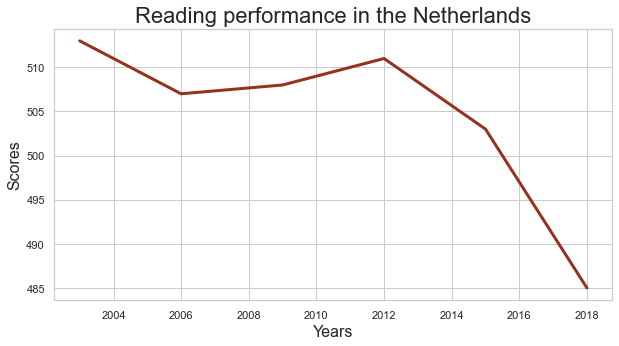

In [180]:
plt.figure( figsize = ( 10,5 ) )

graph = sns.lineplot( data = df_nl_tot, x='year', y='pisa_read', color='#94321c', linewidth=3 )


graph.set_xlabel('Years' , size = 16 )
graph.set_ylabel('Scores' , size = 16 )
graph.set_title( 'Reading performance in the Netherlands' , size = 22 )


plt.show()

To display the score for boys and for girls separately (question 6), we firstly need to create a dataframe which contains the scores for boys and girls. In other words, we need to select rows in which the `subject` column either has 'BOY' or 'GIRL' as a value. 

In [181]:
df_nl_bg = df_nl[ df_nl['subject'].isin( ['BOY','GIRL']  ) ]

The newly created dataframe `df_nl_bg` now contains all the values for Dutch boys and girls, measured in between 2000 and 2018. These values can be plotted as a line chart, using the `lineplot()` method in `Seaborn`. When you add a parameter named `hue`, pointing to the `subject` variable in the dataframe, different lines will be drawn for all the unique values in this particular column. 

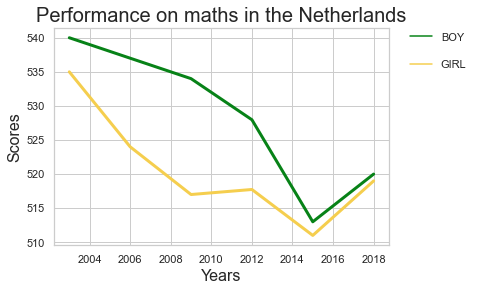

In [182]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure( figsize = ( 6,4 ))
ax = plt.axes()

#, '#3242a8'

#plt.style.use('seaborn-whitegrid')

sns.lineplot( data = df_nl_bg , x = 'year' , y = 'pisa_math' ,  hue = 'subject' , palette = [ '#078217' , '#f5ce4e' ] ,  linewidth = 3 )

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


ax.set_xlabel('Years' , size = 16 )
ax.set_ylabel('Scores' , size = 16 )
ax.set_title( 'Performance on maths in the Netherlands' , size = 20 )


plt.savefig('maths.png')

A box plot, finally, can be created using the `boxplot()` function.

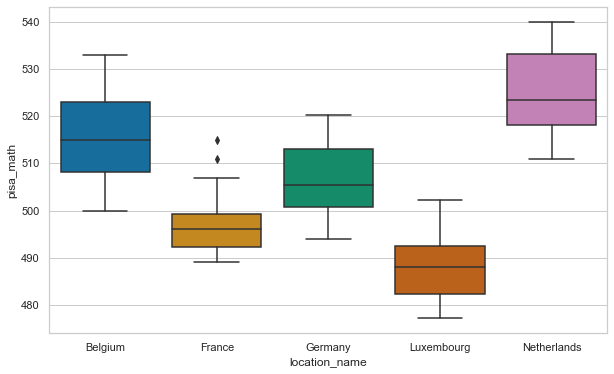

In [186]:
%matplotlib inline

countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg']
colours = sns.color_palette('colorblind' , len(countries))

plt.figure( figsize = (10,6) )

df_countries = df[ df['location_name'].isin(countries) ]

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data= df_countries , x = 'location_name' , y = 'pisa_math' , palette = colours  );

## Exercise 12.5

Download the CSV file ‘nobel.csv’: [https://edu.nl/3xmbd](https://edu.nl/3xmbd). If you have done exercise 11.1 of this tutorial, you have downloaded this file already. Visualise the data in this data set in the followng ways.

* Create a linechart in Seaborn to visualize the number of Nobel laureates per year. Can we find support for the claim that people increasingly need to share their Nobel Prizes with colleagues? 
* What are the nationalities of the Nobel laureates in the data set? Try to generate a bar plot which displays the various countries on the x-axis and the number of Nobel Prize winners produced by these countries on the y-axis. Limit your analysis to the countries listed in `countries` below.

```
    countries = ['Netherlands', 'France', 'Switzerland', 'India', 'Sweden',
       'Norway', 'United Kingdom', 'Spain', 'Russia', 'Poland', 'Germany',
       'Italy', 'United States of America', 'Belgium', 'Australia',
       'Ireland', 'Canada', 'Argentina', 'Japan', 'China', 'Brazil',
       'Bulgaria']
```


* Examine the correlation between the age of the Nobel laureate and year in which the prize was awarded. Do winners get younger, on average? Limit your analysis to the Prizes awarded in Chemistry. To answer this and the next question, you may reuse code developed for exercise 11.1.
* Create a boxplot to visualise the age distribution per category. 


In [187]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get('https://edu.nl/3xmbd')
if response:
    data = response.text
    with open('nobel.csv' , 'w') as csv:
        csv.write(data)
        
df = pd.read_csv('nobel.csv')

In [ ]:
## group by year
laureates_per_year = df.groupby('Year')['Laureate ID'].count()

## convert the result of 'group by' to data frame
lpg_df = laureates_per_year.to_frame()
lpg_df = lpg_df.reset_index()
columns = ['Year','Number']
lpg_df.columns = columns

plt.figure( figsize = (9,5))

graph = sns.lineplot( data = lpg_df , x = 'Year' , y = 'Number' , color = '#2a137d' )

graph.set_title('Number of Nobel laureates per year' , size = 20) 
graph.set_xlabel('Year' , size = 15) 
graph.set_ylabel('Number of laureates' , size = 15)

plt.show()

In [ ]:
countries = ['Netherlands', 'France', 'Switzerland', 'India', 'Sweden',
       'Norway', 'United Kingdom', 'Spain', 'Russia', 'Poland', 'Germany',
       'Italy', 'United States of America', 'Belgium', 'Australia',
       'Ireland', 'Canada', 'Argentina', 'Japan', 'China', 'Brazil',
       'Bulgaria']

df_countries = df[ df['Birth Country'].isin(countries) ]

# group by countries
laureates_per_country = df_countries.groupby('Birth Country')['Laureate ID'].count()
lpg_df = laureates_per_country.to_frame()

# Rename the columns
lpg_df = lpg_df.reset_index()
columns = ['Country','Number']
lpg_df.columns = columns

# Sort countries by number of laureates
lpg_df = lpg_df.sort_values(by=['Number'] , ascending = False)


In [ ]:
plt.figure( figsize = (9,5))

graph = sns.barplot( data = lpg_df , x = 'Country' , y = 'Number' , color = '#0fa838' )

graph.set_title('Number of Nobel laureates per year' , size = 20) 
graph.set_xlabel('Year' , size = 15) 
graph.set_ylabel('Number of laureates' , size = 15)

plt.xticks(rotation=80)
plt.show()



In [ ]:
# extract the year of birth from the birth date
df['Birth Year'] = pd.to_datetime(df['Birth Date']).dt.year

# calculate age by subtracting birth year from year of nobel prize 
df['Age'] = df['Year'] - df['Birth Year']


In [ ]:
df_chem = df[ df['Category'] == 'Chemistry']

fig = plt.figure( figsize = (9,5))

graph = sns.scatterplot( data = df_chem , x = 'Year' , y = 'Age' , color =  '#e35130')

graph.set_title('Age of Nobel laureates' , size = 20) 
graph.set_xlabel('Year' , size = 15) 
graph.set_ylabel('Age' , size = 15)

for i,row in df_chem.iterrows():
    plt.text( int(row['Year']) , int(row['Age']) , row['Full Name'] , alpha = 0.7)

plt.show()

In [ ]:
colours = ['#4287f5','#f5ce42','#b317e3','#b50430','#c97506','#35bd17']

fig = plt.figure( figsize = (9,5))

graph = sns.boxplot( data = df , x = 'Category' , y = 'Age' , palette= sns.color_palette() )

graph.set_title('Age distribution per category' , size = 20) 
graph.set_xlabel('Category' , size = 15) 
graph.set_ylabel('Age' , size = 15)

plt.show()